# Разведочный анализ данных: ДЗ

Мы будем работать с датасетом про 'морское ушко' - ABALONE.

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ABALONE_DATASET = "datasets/abalone.csv"

In [3]:
df = pd.read_csv(ABALONE_DATASET)

## Описание данных

- <b>Sex</b> - nominal - M, F, and I (недоросль)

- <b>Length</b> - Длина ракушки, мм

- <b>Diameter</b> - диаметр ракушки, мм

- <b>Height</b> - высота ракушки, мм

- <b>Whole weight</b> - вес ракушки, гр

- <b>Shucked weight</b> - вес мяса ракушки, гр

- <b>Viscera weight</b> - вес внутреностей ракушки, гр

- <b>Shell weight</b> - вес раковины после усушки, гр

- <b>Rings</b> - Возраст(кольца) -целевой параметр, Int

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Исследование данных

Размер датасета

In [5]:
df.shape

(4177, 9)

Информация о типах данных и пропусках

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
#В датасете есть пропуски
df.isnull().sum()

Sex                0
Length             0
Diameter          99
Height             0
Whole weight      99
Shucked weight     0
Viscera weight     0
Shell weight      50
Rings              0
dtype: int64

In [8]:
#проверяем на дублткаты
df.duplicated().sum()

0

In [9]:
#проверяем проценты пропусков
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

In [10]:
#замена на медианное значения
df = df.rename(columns={"Whole weight" : 'Whole_weight', "Shucked weight" : 'Shucked_weight', "Viscera weight" : 'Viscera_weight', "Shell weight" : 'Shell_weight'})
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [11]:
median_Diameter = df['Diameter'].median()

df['Diameter'].fillna(median_Diameter, inplace=True)

In [12]:
median_Whole_weight = df['Whole_weight'].median()

df['Whole_weight'].fillna(median_Whole_weight, inplace=True)

In [13]:
median_Shell_weight = df['Shell_weight'].median()

df['Shell_weight'].fillna(median_Shell_weight, inplace=True)

In [14]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.408246,0.139516,0.826623,0.359367,0.180594,0.239023,9.933684
std,0.120093,0.098137,0.041827,0.484521,0.221963,0.109614,0.138108,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


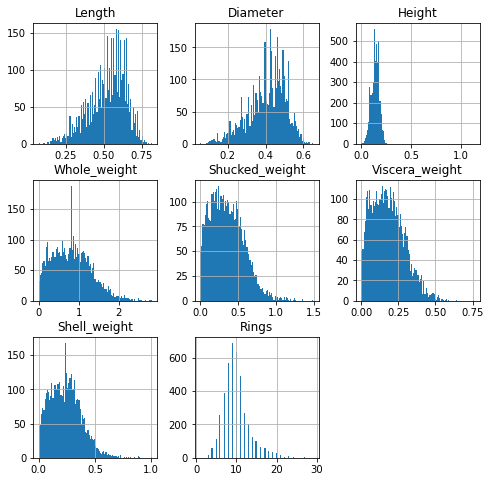

In [15]:
df.hist(bins=100, figsize=(8,8));

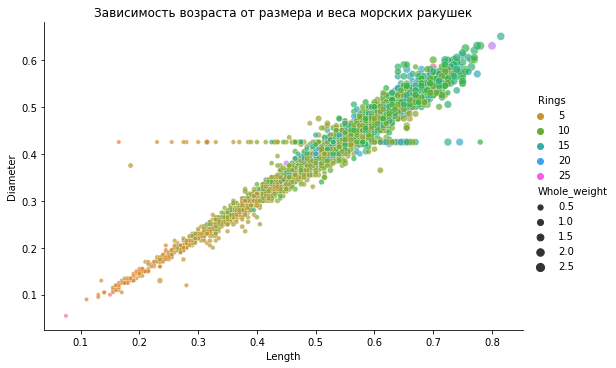

In [17]:
sns.relplot(x='Length', y='Diameter', hue='Rings', size='Whole_weight', data=df, height=5, aspect=1.5, alpha=0.7, palette='husl')
plt.title("Зависимость возраста от размера и веса морских ракушек")
plt.show()

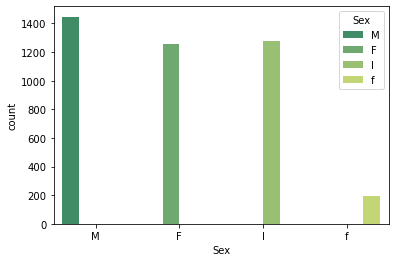

In [19]:
#распределение по полу
sns.countplot(x = 'Sex', data = df, hue='Sex', palette='summer');

In [20]:
#явная ошибка в названии исправляем
df['Sex'] = df['Sex'].replace('f', 'F')

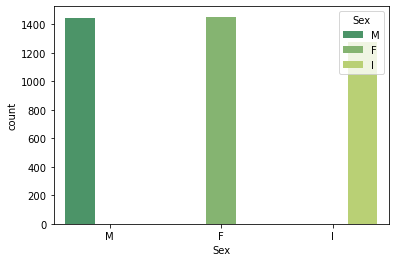

In [21]:
sns.countplot(x = 'Sex', data = df, hue='Sex', palette='summer');

<AxesSubplot:xlabel='count', ylabel='Rings'>

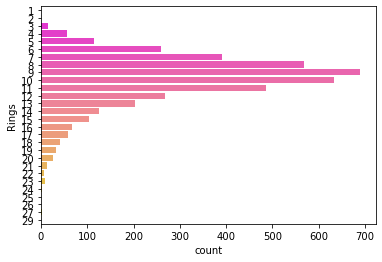

In [24]:
#целевой параметр более точно
sns.countplot(data=df, y='Rings',palette='spring')

In [ ]:
#Распределение выглядит как нормальное распределение, но со сдвигом влево. 
# -Какие проблемы в связи с этим могут возникнуть при обучении моделей?

#наверное будут проблемы с длиными хвостами

## Взаимозависимость в данных

### Корреляции

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

<AxesSubplot:>

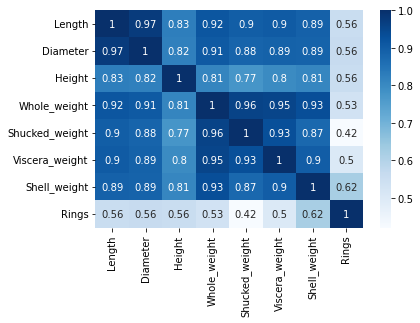

In [25]:
corr = df.corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

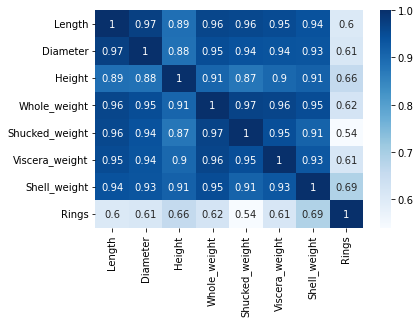

In [26]:
corr = df.corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True);

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

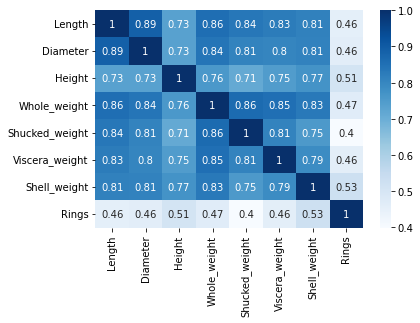

In [27]:

corr = df.corr(method='kendall')

sns.heatmap(corr, cmap="Blues", annot=True);

### V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*
у нас только одно категориальное.(по всей видимости для нашего датасета не подходит)

### ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [28]:
from scipy.stats import f_oneway

In [29]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole_weight,Yes
4,Sex,Shucked_weight,Yes
5,Sex,Viscera_weight,Yes
6,Sex,Shell_weight,Yes
7,Sex,Rings,Yes


## Polars

В конце 2020 года в python стала доступна библиотека Polars.

Polars - это высокопроизводительная библиотека для манипуляции и анализа данных в Python и Rust. Она была создана как альтернатива Pandas, но с учетом возможностей параллельной обработки данных на многопроцессорных системах.

Одним из основных преимуществ Polars является его скорость работы с данными. Polars использует многопоточную обработку данных, что позволяет обрабатывать большие объемы данных на многопроцессорных системах в несколько раз быстрее, чем Pandas. Кроме того, Polars имеет более эффективную систему памяти, что позволяет работать с данными, которые не помещаются в оперативной памяти.


In [30]:
df_big = df.copy()

for i in range(250):
    df_big = pd.concat([df_big, df])

df_big.to_csv("datasets/abalone_big.csv", index=False)

In [31]:
df_big.shape, df.shape

((1048427, 9), (4177, 9))

In [32]:
!pip install polars

import polars as pl

print(pl.__version__)

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


0.20.31


### Загрузка данных

In [33]:
%%time

df_pl = pl.read_csv("datasets/abalone_big.csv")

Wall time: 467 ms


In [34]:
%%time

df = pd.read_csv("datasets/abalone_big.csv")

Wall time: 745 ms


### Выбор и фильтрация данных

In [35]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
%%time

df[['Length', 'Diameter', 'Height', 'Whole_weight']]

Wall time: 17 ms


,Length,Diameter,Height,Whole_weight
0,0.455,0.365,0.095,0.5140
1,0.350,0.265,0.090,0.2255
2,0.530,0.420,0.135,0.6770
3,0.440,0.365,0.125,0.7985
4,0.330,0.255,0.080,0.2050
...,...,...,...,...
1048422,0.565,0.450,0.165,0.8870
1048423,0.590,0.440,0.135,0.9660
1048424,0.600,0.475,0.205,1.1760
1048425,0.625,0.485,0.150,1.0945


In [38]:
%%time

df_pl[['Length', 'Diameter', 'Height', 'Whole_weight']]

# df_pl.select(pl.col(['carat', 'depth']))

Wall time: 0 ns


Length,Diameter,Height,Whole_weight
f64,f64,f64,f64
0.455,0.365,0.095,0.514
0.35,0.265,0.09,0.2255
0.53,0.42,0.135,0.677
0.44,0.365,0.125,0.7985
0.33,0.255,0.08,0.205
…,…,…,…
0.565,0.45,0.165,0.887
0.59,0.44,0.135,0.966
0.6,0.475,0.205,1.176


In [40]:

%%time

df.query('Rings > 5')

Wall time: 102 ms


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
1048423,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1048424,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
1048425,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:

%%time

df_pl.filter(pl.col('Rings') > 5)

Wall time: 93 ms


Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
…,…,…,…,…,…,…,…,…
"""F""",0.565,0.45,0.165,0.887,0.37,0.239,0.249,11
"""M""",0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10
"""M""",0.6,0.475,0.205,1.176,0.5255,0.2875,0.308,9




Отфильтруйем таблицу, оставив в ней только строки, удовлетворяющие условиям:
* `Sex` = "M"
* `Rings` > 5




In [45]:
%%time

df_pl.filter((pl.col('Sex') == 'M') & (pl.col('Rings') > 5))

Wall time: 22 ms


Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""M""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
"""M""",0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10
…,…,…,…,…,…,…,…,…
"""M""",0.55,0.43,0.13,0.8395,0.3155,0.1955,0.2405,10
"""M""",0.56,0.43,0.155,0.8675,0.4,0.172,0.229,8
"""M""",0.59,0.44,0.135,0.966,0.439,0.2145,0.2605,10


### Агрегация данных

In [46]:
df_pl.head()

Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [47]:
%%time

df.groupby('Whole_weight').agg({'Diameter' : 'mean', 'Rings' : 'max'})

Wall time: 106 ms


,Diameter,Rings
Whole_weight,,
0.0020,0.055,1
0.0080,0.090,3
0.0105,0.095,4
0.0130,0.100,3
0.0140,0.105,3
...,...,...
2.5500,0.570,14
2.5550,0.600,11
2.6570,0.630,11


In [49]:
%%time

df_pl.group_by('Whole_weight').agg([pl.mean('Diameter'), pl.max('Rings')])

Wall time: 55 ms


Whole_weight,Diameter,Rings
f64,f64,i64
1.073,0.46,19
0.2545,0.2875,6
0.282,0.298333,9
0.2965,0.2875,10
0.642,0.41,9
…,…,…
0.517,0.355,9
0.983,0.451667,10
1.08,0.465,9


In [52]:
%%time

q = (
    df_pl
    .lazy()
    .group_by(args='Whole_weight')
    .agg(
        [
            pl.col('Diameter').mean(),
            pl.col('Rings').max()
        ]
    )
)

Wall time: 0 ns


In [53]:
%%time

q.collect()

Wall time: 32 ms


args,Diameter,Rings
f64,f64,i64
0.5495,0.375,7
0.262,0.32,8
0.353,0.32,8
0.7745,0.423333,11
1.0075,0.475,15
…,…,…
0.9875,0.445,8
0.6435,0.394,12
2.499,0.585,17


### Выводы

1.Исследовали целевой датасет из 4177строк и 9 колонок.
В нем нет дубликатов но есть пропуски в трех колонках.
Пропуски заменены на медианные значения. В колонке высота ракушки минимальное значение ноль, что указывает
на невозможность измерения параметра либо ошибку измерения.
2.Распределение целевого параметра, выглядит как нормальное распределение, но со сдвигом влево.
Что вероятней вызывет необходимость обработки хвостов при последуещем обучении модели.
3.Корреляционная матрица показывает, что существуют сильная положительные корреляция между физическими показателями морских ушек (длина, диаметр, рост и вес)
С Возрастом(целевой показатель) морских ушек увеличивается их длины, диаметр, рост и веса
Общий вес почти линейно изменяется вместе со всеми другими характеристиками.(что вероятней вызвано нормальным питанием и хорошей экологией)
4.Нельзя сказать, что Polars во всех запросах сильно выигрывает у Pandas.(Для датасета в 1 млн. строк можно спокойно обойтись пандой) 




In [ ]:
# 